In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import os

In [2]:
images_crater=np.load("images_crater.npy")

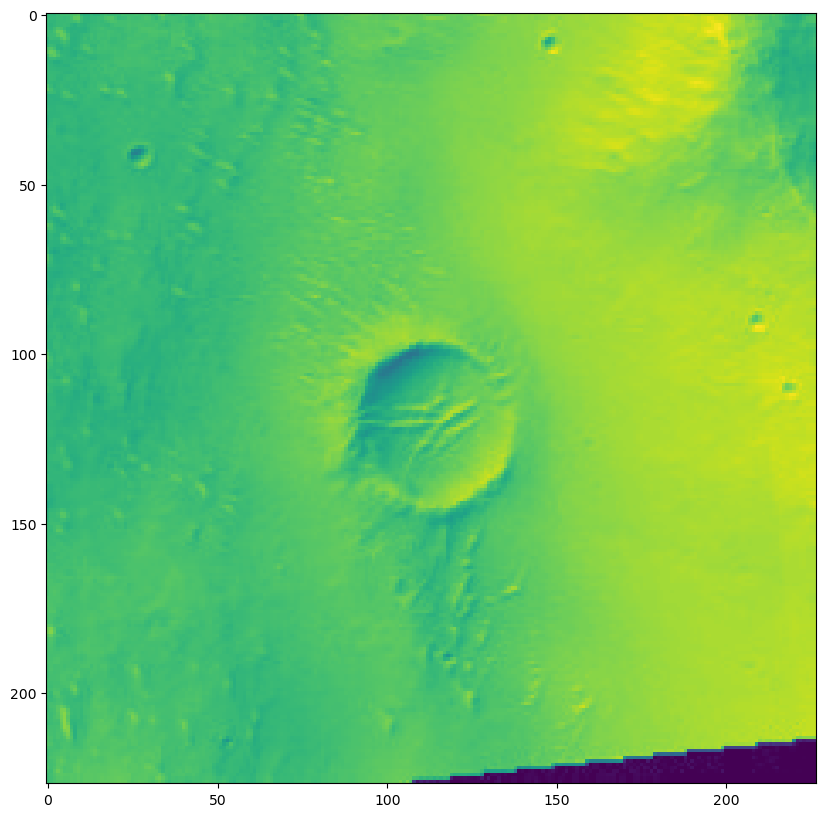

In [3]:
a=np.random.randint(0,len(images_crater))
sample=images_crater[a,0,:,:]
plt.figure(figsize=(10,10))
plt.imshow(sample)

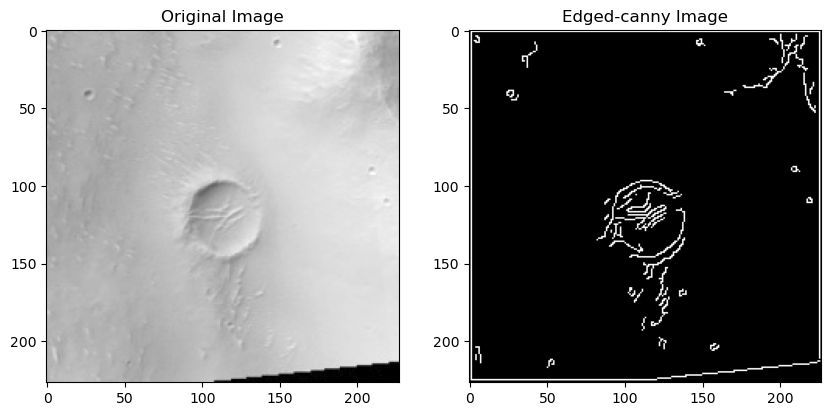

In [5]:
from skimage import io, feature


edges = feature.canny(sample)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(sample, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(edges, cmap='gray')
ax2.set_title('Edged-canny Image')
plt.show()

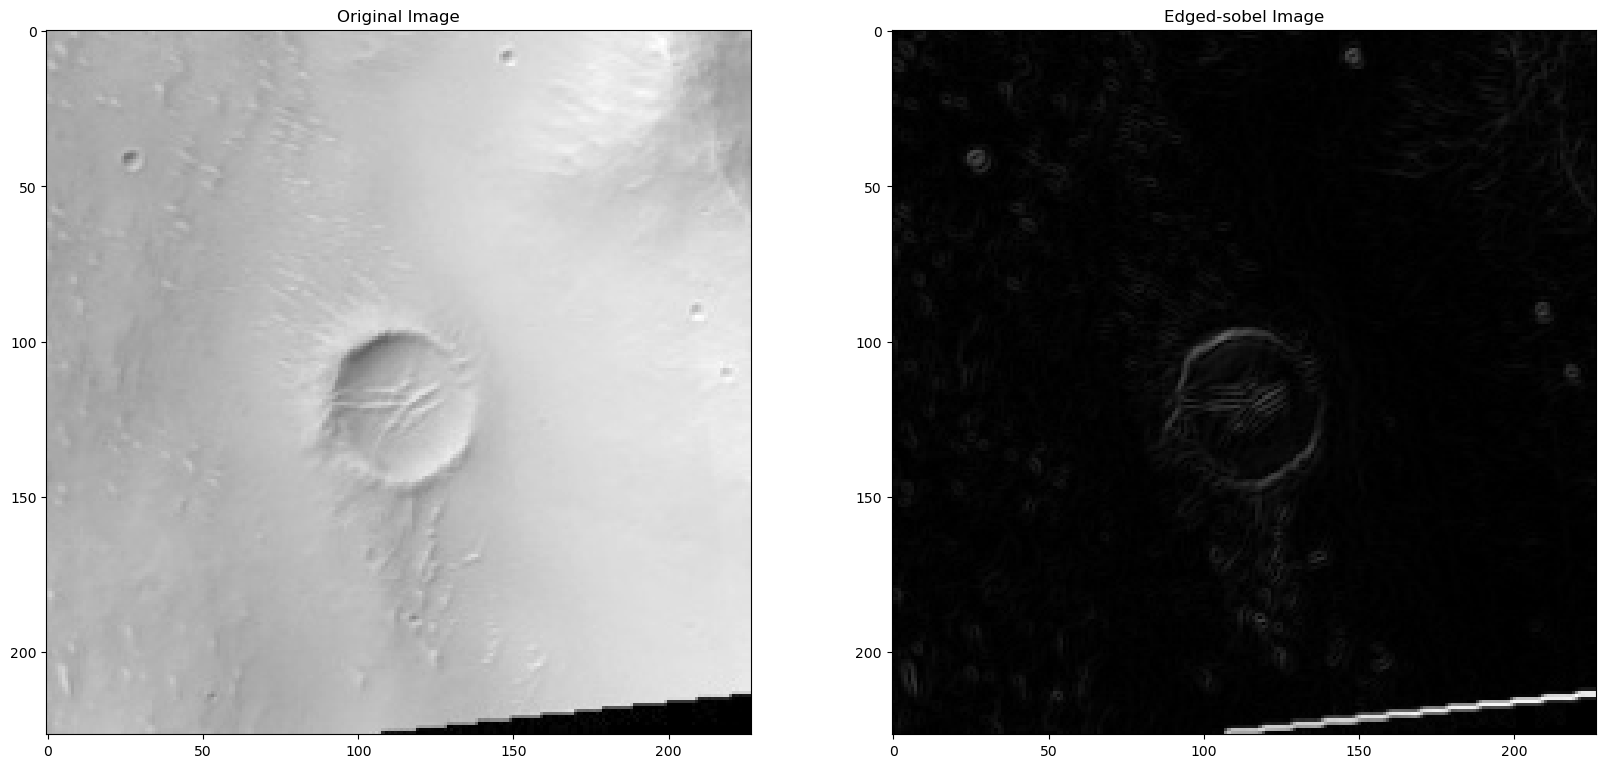

In [6]:
from skimage import io, filters


edges = filters.sobel(sample)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(sample, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(edges, cmap='gray')
ax2.set_title('Edged-sobel Image')
plt.show()

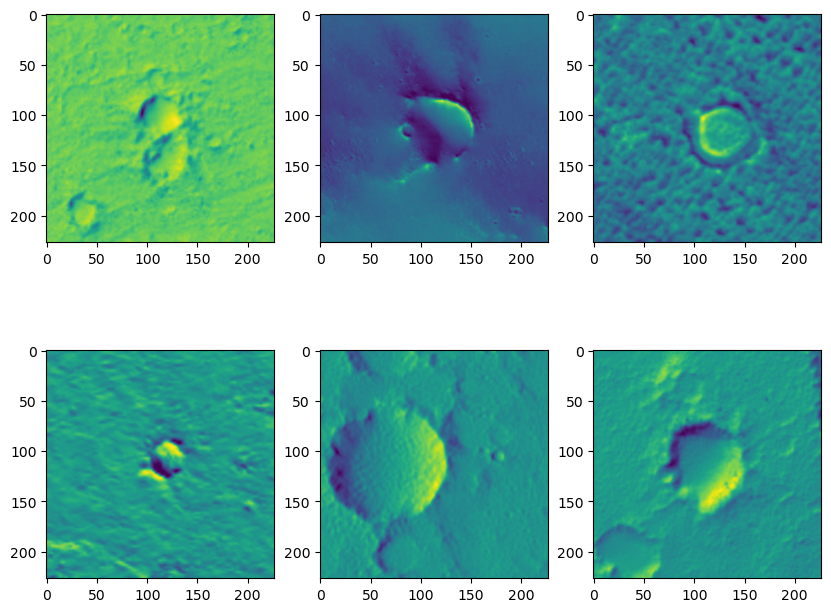

In [7]:
images = images_crater

# Choose six random indices
indices = np.random.randint(0, images.shape[0], size=6)

# Select the images at the random indices
selected_images = images[indices]

# Create a figure with a 2x3 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# Iterate over the subplots
for ax, image in zip(axs.flat, selected_images):
    # Display the image in the subplot
    ax.imshow(image[0,:,:])

# Show the plot
plt.show()


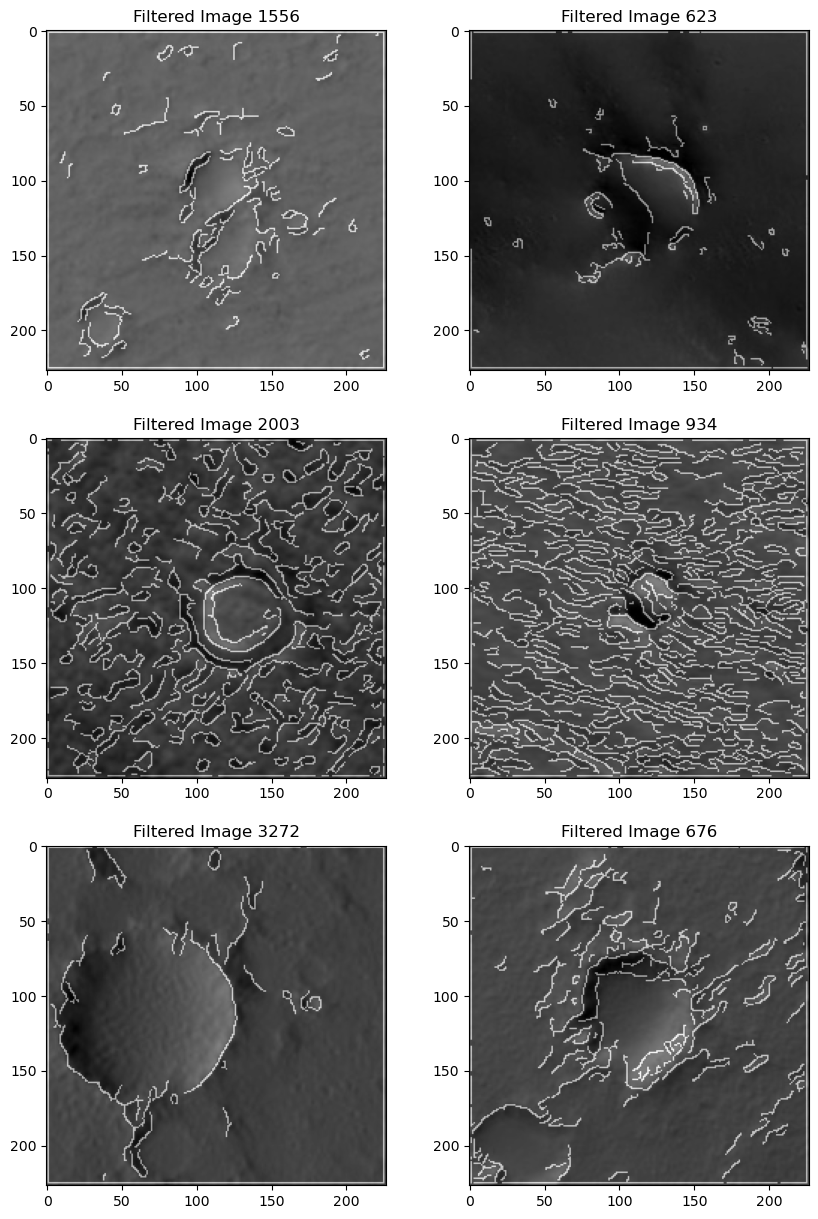

In [8]:


# Select the images at the random indices
selected_images = images[indices]

# Create a figure with a 3x2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Iterate over the subplots
for ax, image, index in zip(axs.flat, selected_images, indices):
    # Apply the Canny filter to the image
    filtered_image = feature.canny(image[0,:,:], sigma= 0.8)
    
    # Display the original image in the left subplot
    ax.imshow(image[0,:,:], cmap='gray')
    ax.set_title(f'Original Image {index+1}')
    
    # Display the filtered image in the right subplot
    ax.imshow(filtered_image, cmap='gray', alpha=0.5)
    ax.set_title(f'Filtered Image {index+1}')

# Show the plot
plt.show()


In [14]:
from sklearn.cluster import KMeans

# Load the image
image =  images_crater[:,0,:,:]



In [15]:
image.shape

(4900, 227, 227)

In [17]:
features = image.reshape(image.shape[0], -1)

# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3)

# Fit the model to the features
model.fit(features)

# Predict the cluster labels for the features
cluster_labels = model.predict(features)



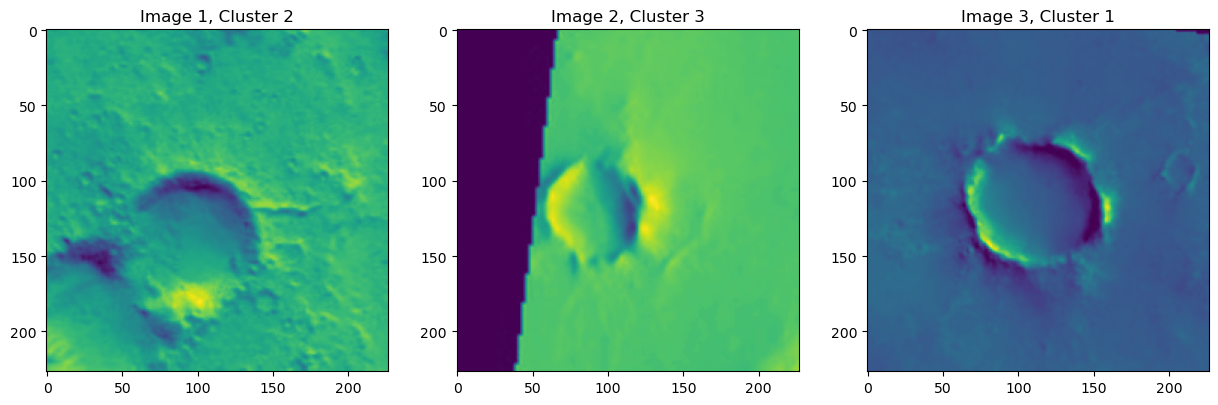

In [33]:
# Display the original and classified images
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.imshow(image[i])
    ax.set_title(f'Image {i+1}, Cluster {cluster_labels[i]+1}')
plt.show()

In [31]:
np.count_nonzero(cluster_labels == 1)

804

In [29]:
np.count_nonzero(cluster_labels == 2)

2507

In [30]:
np.count_nonzero(cluster_labels == 0)

1589

In [32]:
plt.plot()

4900